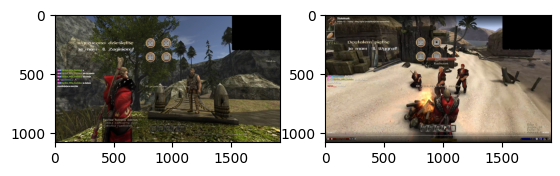

In [172]:
# Load reference images
import cv2
from matplotlib import pyplot as plt
import numpy as np

ref_loss = cv2.imread('data/ref_loss.png')
ref_win = cv2.imread('data/ref_win.png')

# Show images with matplotlib
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ref_loss, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ref_win, cv2.COLOR_BGR2RGB))
plt.show()

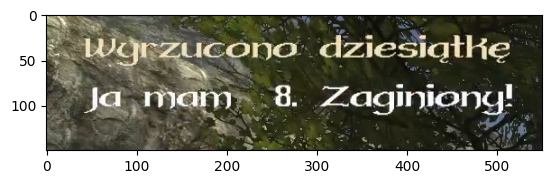

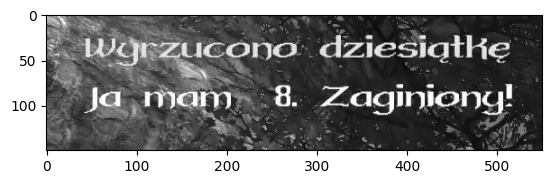

In [173]:
# Select the middle of the image
ref_loss = ref_loss[200:350, 150:700]
ref_win = ref_win[200:350, 150:700]

plt.imshow(cv2.cvtColor(ref_loss, cv2.COLOR_BGR2RGB))
plt.show()

gray_loss = cv2.cvtColor(ref_loss, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_loss, cmap='gray')
plt.show()

In [174]:
# Prepare the image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'

_, thresholded_image_loss = cv2.threshold(gray_loss, 164, 255, cv2.THRESH_BINARY)

In [175]:
loss_text = pytesseract.image_to_string(thresholded_image_loss, lang="pol")
print(loss_text)

RZ
z Wąrzyucono dziesiątkę
7 NI

Jja,mam 8. Zaginiony!


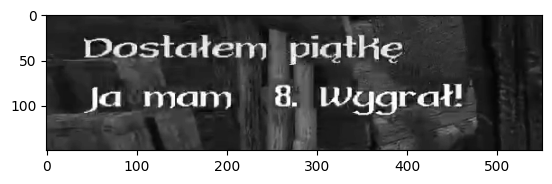

Dostałem piątkę
Ja mam 8. Wygrał!


In [176]:
# Do the same for the winning image
gray_win = cv2.cvtColor(ref_win, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_win, cmap='gray')
plt.show()

_, thresholded_image_win = cv2.threshold(gray_win, 164, 255, cv2.THRESH_BINARY)

win_text = pytesseract.image_to_string(thresholded_image_win, lang="pol")
print(win_text)

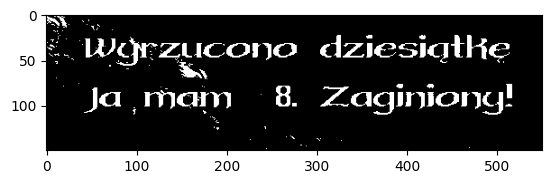

In [177]:
# Additional preprocessing
ref_loss = cv2.imread('data/ref_loss.png')

# Select the middle of the image
ref_loss = ref_loss[200:350, 150:700]
ref_win = ref_win[200:350, 150:700]

# Convert to grayscale
gray_loss = cv2.cvtColor(ref_loss, cv2.COLOR_BGR2GRAY)

# Threshold the image
_, thresholded_image_loss = cv2.threshold(gray_loss, 164, 255, cv2.THRESH_BINARY)

# Morphological operations
kernel = np.ones((1, 1), np.uint8)
thresholded_image_loss = cv2.erode(thresholded_image_loss, kernel, iterations=1)
thresholded_image_loss = cv2.dilate(thresholded_image_loss, kernel, iterations=1)

# Display the image
plt.imshow(thresholded_image_loss, cmap='gray')
plt.show()

In [178]:
# Try reading the text
loss_text = pytesseract.image_to_string(thresholded_image_loss, lang="pol")

print(loss_text)

RZ
z Wąrzyucono dziesiątkę
7 NI

Jja,mam 8. Zaginiony!
